In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('video_games.csv')
df

,name,platform,release_date,summary,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9
...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",1.7


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   user_review   18800 non-null  object
dtypes: object(5)
memory usage: 734.5+ KB


In [42]:
unique_game_count = df['name'].nunique()
print("Number of unique game names:", unique_game_count)

Number of unique game names: 12254


In [43]:
df.describe()

,name,platform,release_date,summary,user_review
count,18800,18800,18800,18686,18800
unique,12254,22,4533,14647,94
top,Cars,PC,"November 14, 2006","Iron Man, an explosive third-person action sho...",tbd
freq,9,4864,48,7,1365


In [44]:
df.isnull().sum()

name              0
platform          0
release_date      0
summary         114
user_review       0
dtype: int64

In [45]:
null_names = df[df['summary'].isna()]
null_names

,name,platform,release_date,summary,user_review
833,Injustice 2: Legendary Edition,PlayStation 4,"March 27, 2018",NaN,7.6
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",NaN,tbd
1535,Mini Metro,Switch,"August 30, 2018",NaN,8.4
1649,Out of the Park Baseball 13,PC,"April 9, 2012",NaN,7.8
2427,Guild Wars 2: Path of Fire,PC,"September 22, 2017",NaN,7.3
...,...,...,...,...,...
17999,One Piece: Unlimited Cruise SP,PlayStation 4,"February 10, 2012",NaN,7.0
18134,AeternoBlade II,Wii U,"October 11, 2019",NaN,4.4
18253,Surgeon Simulator: Experience Reality,PlayStation 4,"December 3, 2016",NaN,4.3
18532,The Ripping Friends,Game Boy Advance,"March 24, 2002",NaN,tbd


In [46]:
df.dropna(subset=['summary'], inplace=True)
df.isnull().sum()

name            0
platform        0
release_date    0
summary         0
user_review     0
dtype: int64

In [47]:
print(df['user_review'].describe())


count     18686
unique       94
top         tbd
freq       1345
Name: user_review, dtype: object


In [48]:
df['user_review'].replace('tbd', pd.NA, inplace=True)
df.dropna(subset=['user_review'], inplace=True)
print(df['user_review'].describe())

count     17341
unique       93
top         7.7
freq        726
Name: user_review, dtype: object


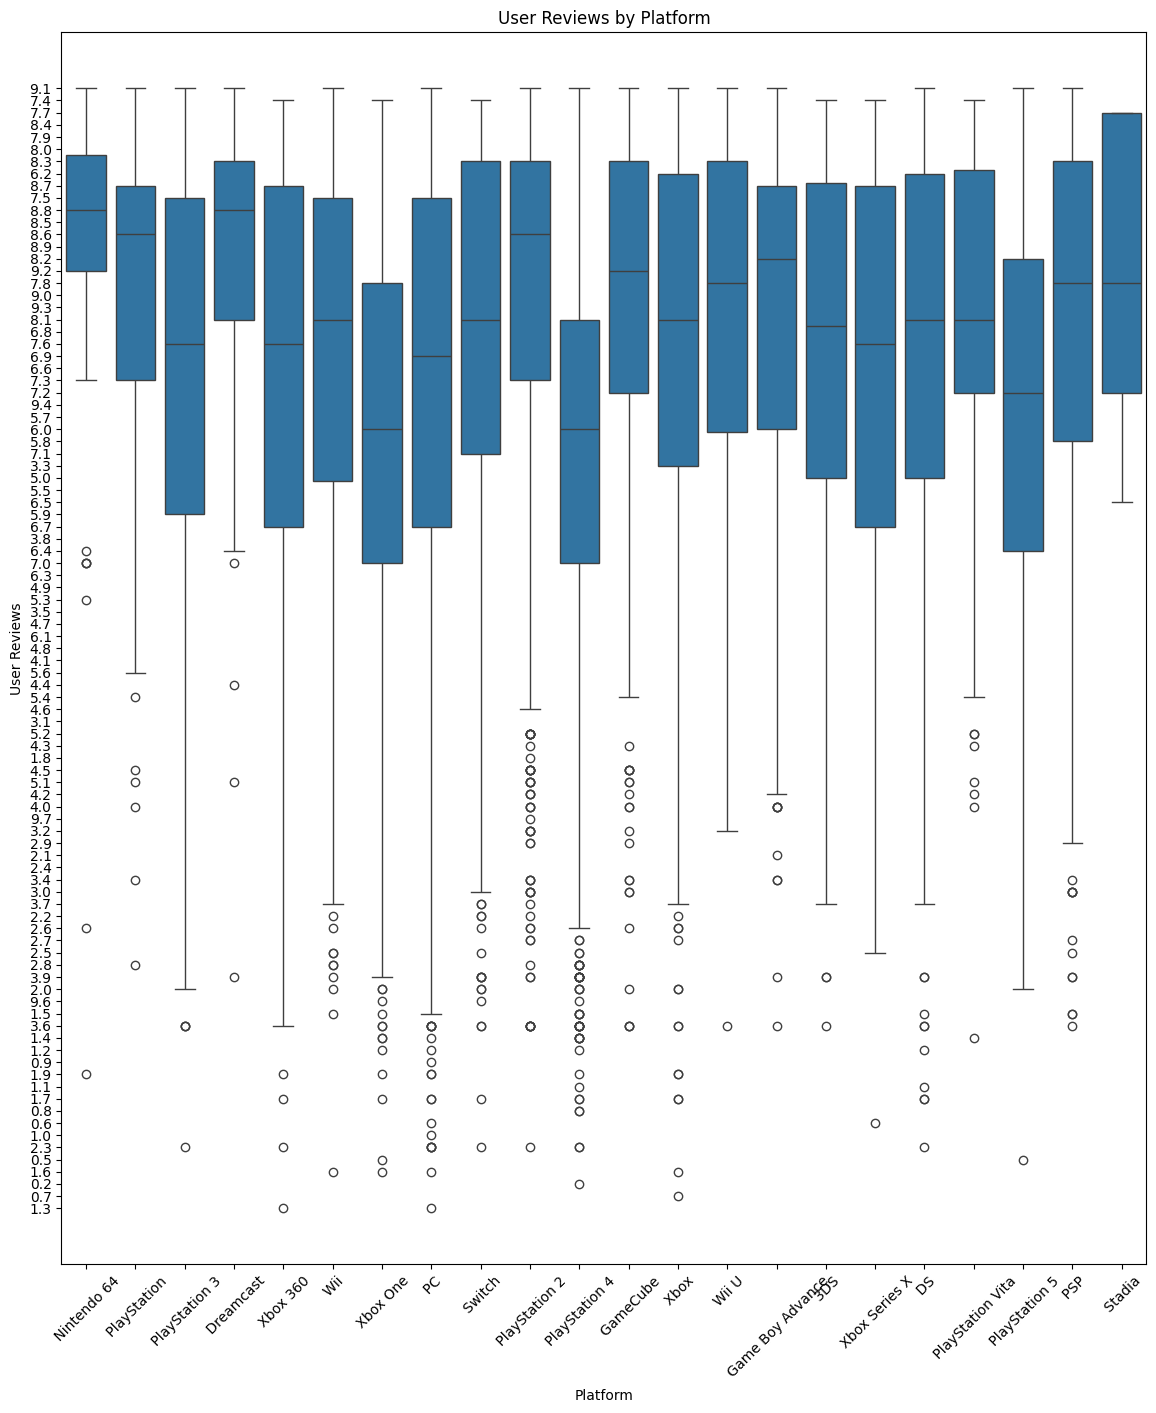

In [50]:
plt.figure(figsize=(14, 16))
sns.boxplot(x='platform', y='user_review', data=df)
plt.title('User Reviews by Platform')
plt.xlabel('Platform')
plt.ylabel('User Reviews')
plt.xticks(rotation=45)
plt.show()

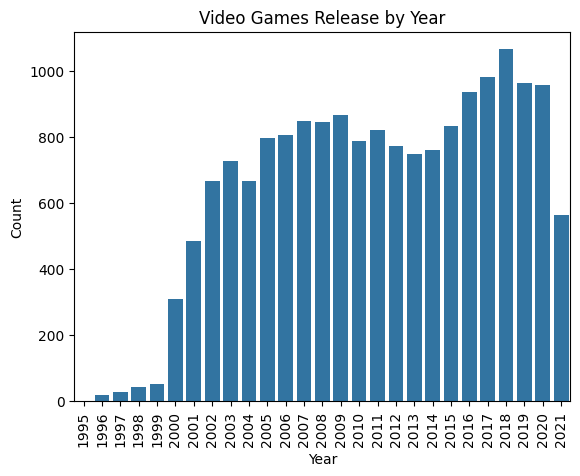

In [51]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.year
sns.countplot(x='release_date', data=df)
plt.title('Video Games Release by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

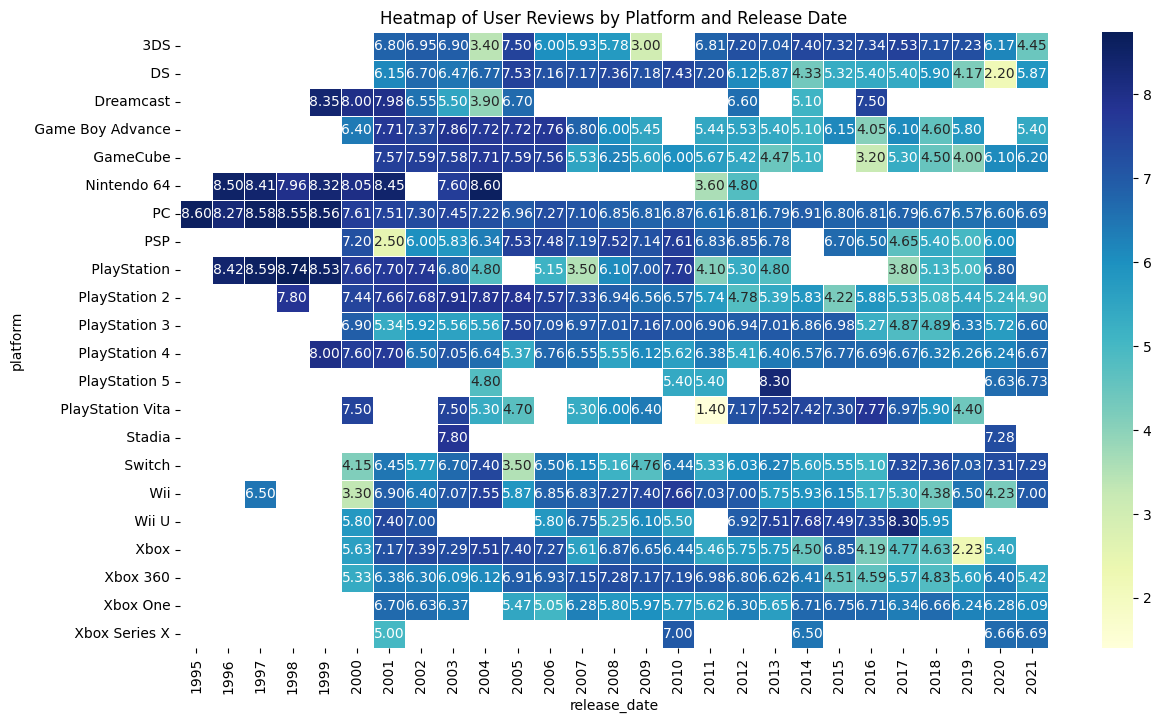

In [52]:
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')
pivot_table = pd.pivot_table(df, values='user_review', index='platform', columns='release_date', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of User Reviews by Platform and Release Date')
plt.show()

In [23]:
print(df['platform'].dtype)
print(df['platform'].unique())


object
[' Nintendo 64' ' PlayStation' ' PlayStation 3' ' Dreamcast' ' Xbox 360'
 ' Wii' ' Xbox One' ' PC' ' Switch' ' PlayStation 2' ' PlayStation 4'
 ' GameCube' ' Xbox' ' Wii U' ' Game Boy Advance' ' 3DS' ' Xbox Series X'
 ' DS' ' PlayStation Vita' ' PlayStation 5' ' PSP' ' Stadia']


In [25]:
df['platform'] = df['platform'].str.strip()
xbox_series_x_rows = df[(df['platform'] == 'Xbox Series X') & (df['release_date'] < 2002)]
print(xbox_series_x_rows)


                 name       platform  release_date  \
18038  Arctic Thunder  Xbox Series X          2001   

                                                 summary  user_review  
18038  Climb on for a little high-speed snowmobile ra...          5.0  


In [26]:
df.to_csv('modified_dataset.csv', index=False)


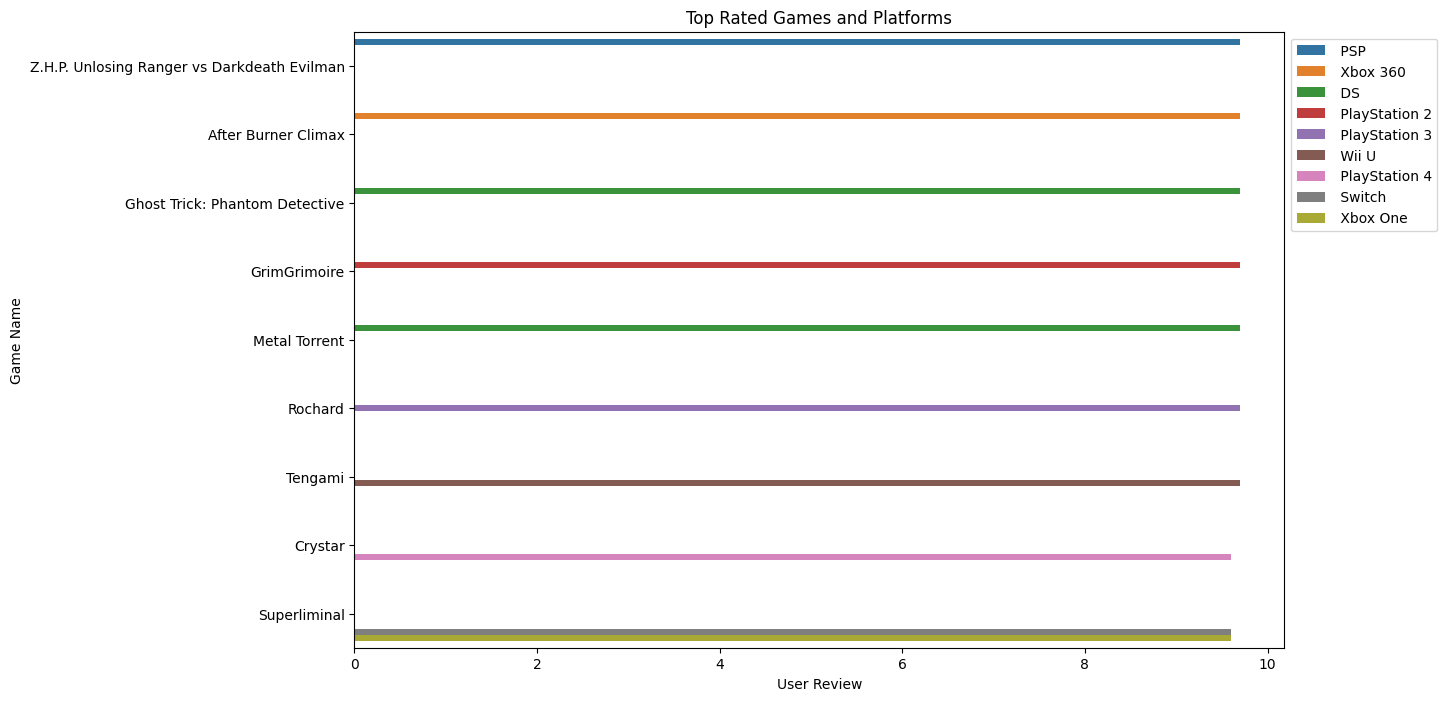

In [59]:
highest_rated_games = df.sort_values(by='user_review', ascending=False)

top_n = 10
top_n_games = highest_rated_games.head(top_n)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='user_review', y='name', hue='platform', data=top_n_games)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Top Rated Games and Platforms')
plt.xlabel('User Review')
plt.ylabel('Game Name')
plt.show()

In [60]:
highest_rated_games

,name,platform,release_date,summary,user_review
3504,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,PSP,2010,"Known as ZettaiHero Keikakuin Japan, Z.H.P. is...",9.7
9550,After Burner Climax,Xbox 360,2010,[Xbox Live Arcade] The classic arcade game Aft...,9.7
2450,Ghost Trick: Phantom Detective,DS,2011,Ghost Trick is a story of mystery and intrigue...,9.7
4844,GrimGrimoire,PlayStation 2,2007,Lillet Blan was very excited. Her heart had be...,9.7
14836,Metal Torrent,DS,2010,[DSiWare] Prepare for a high level of intensit...,9.7
...,...,...,...,...,...
15693,Warcraft III: Reforged,PC,2020,"A Classic Favorite, Reforged. Warcraft III: Re...",0.6
10858,Madden NFL 22,Xbox Series X,2021,There will be more detailed staff management a...,0.6
12336,Madden NFL 22,PlayStation 5,2021,There will be more detailed staff management a...,0.5
11261,Madden NFL 21,Xbox One,2020,Innovative new gameplay mechanics in Madden NF...,0.5


In [61]:
df['platform'] = df['platform'].str.strip()
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')
df.dropna(subset=['user_review'], inplace=True)
yearly_review_mean = df.groupby('release_date')['user_review'].mean().reset_index()
highest_rated_year = yearly_review_mean.loc[yearly_review_mean['user_review'].idxmax(), 'release_date']
lowest_rated_year = yearly_review_mean.loc[yearly_review_mean['user_review'].idxmin(), 'release_date']
print("Year with the highest mean user review:", highest_rated_year)
print("Year with the lowest mean user review:", lowest_rated_year)

Year with the highest mean user review: 1995
Year with the lowest mean user review: 2019


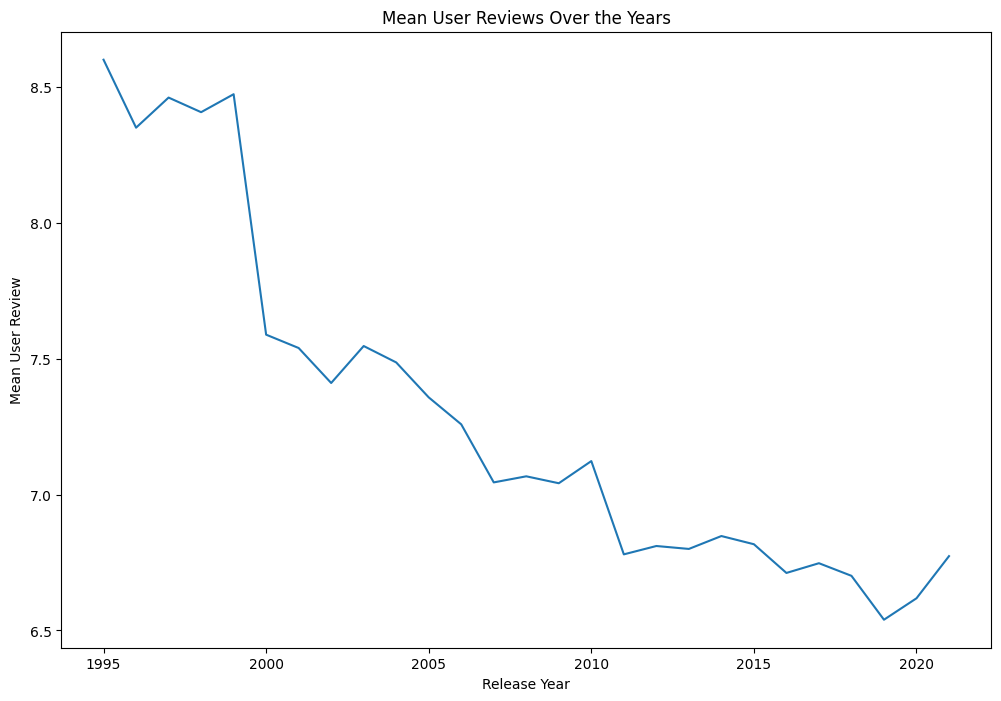

In [62]:
df['platform'] = df['platform'].str.strip()
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')
df.dropna(subset=['user_review'], inplace=True)
yearly_review_mean = df.groupby('release_date')['user_review'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='release_date', y='user_review', data=yearly_review_mean)
plt.title('Mean User Reviews Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Mean User Review')
plt.show()